In [1]:
# Importar bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import heapq


In [3]:
# Cargar archivos CSV
precios_hoteles = pd.read_csv('../data/valenciahoteles.csv', encoding='latin-1')


In [4]:
# Se visualiza el número de registros y variables
precios_hoteles.shape

(3959, 10)

In [5]:
# Se visualizan los primeros 3 registros con sus respectivas variables
precios_hoteles.head(3)

,Nombre,Distrito,Valoración,Número de comentarios,Precio,Fecha,Dirección,CP,lat,long
0,HOSTAL ABASTOS,"Extramurs, Valencia",7.9,767,38.0,2022-07-31,"CALLE DE ALBERIQUE, 19, Valencia",46008,39.466484,-0.388092
1,BIZZBEACH,"Poblados marítimos, Valencia",8.0,206,37.0,2022-07-31,"CALLE DE IBIZA, 17, Valencia",46024,39.460211,-0.339943
2,HOSTAL ON DORMIRE VALENCIA,"Quatre Carreres, Valencia",7.4,1458,27.5,2022-07-31,"CALLE DE RUBEN VELA, 23, Valencia",46006,39.455528,-0.374437


In [6]:
# Se visualizan 3 registros aleatorios con sus respectivas variables
precios_hoteles.sample(5)

,Nombre,Distrito,Valoración,Número de comentarios,Precio,Fecha,Dirección,CP,lat,long
1397,HOTEL MIRAMAR VALENCIA,"Poblados marítimos, Valencia",8.2,1090,98.0,2022-08-21,"PASEO DE NEPTUNO, 32, Valencia",46011,39.464287,-0.323598
371,COSY ROOMS EMBAJADOR,"Ciutat Vella, Valencia",6.9,1637,70.0,2022-12-18,"CALLE DEL EMBAJADOR VICH, 5, Valencia",46002,39.472443,-0.375378
2005,COSY ROOMS EMBAJADOR,"Ciutat Vella, Valencia",6.9,1637,116.5,2022-07-10,"CALLE DEL EMBAJADOR VICH, 5, Valencia",46002,39.472443,-0.375378
3513,HOST & HOME,"Ciutat Vella, Valencia",8.6,650,68.5,2022-10-16,"CALLE DE VITORIA, 3, Valencia",46002,39.472817,-0.376043
2490,HOTEL 19-30 VALENCIA,"Extramurs, Valencia",9.4,546,69.0,2022-09-05,"CALLE DEL CONVENTO DE JERUSALÉN, 30, Valencia",46007,39.465001,-0.380163


In [7]:
# Se visualiza que algunas variables como fecha, CP, lat y long tienen su formato mal definido
precios_hoteles.dtypes

Nombre                    object
Distrito                  object
Valoración               float64
Número de comentarios      int64
Precio                   float64
Fecha                     object
Dirección                 object
CP                         int64
lat                      float64
long                     float64
dtype: object

In [8]:
# Se transforma la columna "Fecha" a formato datetime64[ns]
precios_hoteles['Fecha']  = pd.to_datetime(precios_hoteles['Fecha'],)

# Se transforman las variables CP, lat y long a OBJECT

precios_hoteles['CP'] = precios_hoteles['CP'].astype('object')
precios_hoteles['lat'] = precios_hoteles['lat'].astype('object')
precios_hoteles['long'] = precios_hoteles['long'].astype('object')

In [9]:
precios_hoteles.dtypes

Nombre                           object
Distrito                         object
Valoración                      float64
Número de comentarios             int64
Precio                          float64
Fecha                    datetime64[ns]
Dirección                        object
CP                               object
lat                              object
long                             object
dtype: object

In [10]:
# Estadísticas descriptivas del DataFrame resultante
precios_hoteles.describe()

,Valoración,Número de comentarios,Precio
count,3959.000000,3959.000000,3959.000000
mean,8.316292,2193.210154,140.196262
std,0.616531,2021.854114,84.133629
min,5.700000,12.000000,20.000000
25%,8.000000,1006.000000,84.000000
50%,8.400000,1666.000000,122.000000
75%,8.700000,2629.000000,169.000000
max,9.500000,12713.000000,855.000000


In [11]:
# Análisis por Distrito: Cantidad de distritos
num_distritos = precios_hoteles['Distrito'].nunique()

print("En este Datasets se presentan los siguientes %d distritos:" %num_distritos)
distritos = precios_hoteles['Distrito'].unique()
distritos_df = pd.DataFrame(distritos)
print(distritos_df)


En este Datasets se presentan los siguientes 13 distritos:
                               0
0            Extramurs, Valencia
1   Poblados marítimos, Valencia
2      Quatre Carreres, Valencia
3      El Pla del Real, Valencia
4         Ciutat Vella, Valencia
5             Campanar, Valencia
6             Eixample, Valencia
7       Camins al Grau, Valencia
8            Benicalap, Valencia
9   Poblados del Oeste, Valencia
10          Benimaclet, Valencia
11             Algirós, Valencia
12           La Saïdia, Valencia


In [12]:
# Análisis por Distrito: Cantidad de Hoteles por distrito
precios_hoteles['Distrito'].value_counts()

Ciutat Vella, Valencia          1440
Camins al Grau, Valencia         607
Poblados marítimos, Valencia     415
Eixample, Valencia               408
Quatre Carreres, Valencia        304
Extramurs, Valencia              211
Benicalap, Valencia              157
Campanar, Valencia               126
Poblados del Oeste, Valencia     126
El Pla del Real, Valencia        114
Benimaclet, Valencia              38
Algirós, Valencia                  8
La Saïdia, Valencia                5
Name: Distrito, dtype: int64

In [13]:
# Promedio de valoraciones según distrito

columnas_eliminar = ['Número de comentarios','Precio']

prom_distritos = precios_hoteles.groupby(by='Distrito').mean('Valoración').round(decimals=1).rename(columns={'Valoración': 'Promedio de Valoración'}).drop(columnas_eliminar, axis=1)
prom_distritos.sort_values('Promedio de Valoración', ascending=False)

,Promedio de Valoración
Distrito,
"Eixample, Valencia",8.6
"Benimaclet, Valencia",8.5
"Ciutat Vella, Valencia",8.5
"Extramurs, Valencia",8.4
"Camins al Grau, Valencia",8.3
"El Pla del Real, Valencia",8.3
"Benicalap, Valencia",8.2
"Poblados del Oeste, Valencia",8.2
"Poblados marítimos, Valencia",8.1


In [14]:
# Análisis por Hotel: Cantidad de hoteles
num_hoteles = precios_hoteles['Nombre'].nunique()

print("En este Datasets se presentan los siguientes %d hoteles:" %num_hoteles)
hoteles = precios_hoteles['Nombre'].unique()
hoteles_df = pd.DataFrame(hoteles)
print(hoteles_df)


En este Datasets se presentan los siguientes 154 hoteles:
                              0
0                HOSTAL ABASTOS
1                     BIZZBEACH
2    HOSTAL ON DORMIRE VALENCIA
3                  ZALAMERA BNB
4            SWEET HOTEL RENASA
..                          ...
149  PLAZA REDONDA BRUGADA HOME
150        DORMAVALENCIA HOSTEL
151            THE RIVER HOSTEL
152          UP HOSTEL VALENCIA
153             CANTAGUA HOSTEL

[154 rows x 1 columns]


In [15]:
qa_hoteles = precios_hoteles['Nombre'].value_counts()
qa_hoteles = pd.DataFrame(qa_hoteles)
qa_hoteles.rename(columns={'Nombre': 'Cantidad'})

,Cantidad
THE WESTIN VALENCIA,43
AC HOTEL VALENCIA BY MARRIOTT,43
HOTEL TURIA,43
SERCOTEL SOROLLA PALACE,43
ILUNION AQUA 4,43
...,...
SUITES BY ERIC OLSAN (PESET),1
DORMAVALENCIA HOSTEL,1
THE RIVER HOSTEL,1
UP HOSTEL VALENCIA,1


In [16]:
q_hoteles_may = precios_hoteles['Nombre'].value_counts().head(10)
q_hoteles_may = pd.DataFrame(q_hoteles_may)
q_hoteles_may.rename(columns={'Nombre': 'Cantidad'})

,Cantidad
THE WESTIN VALENCIA,43
AC HOTEL VALENCIA BY MARRIOTT,43
HOTEL TURIA,43
SERCOTEL SOROLLA PALACE,43
ILUNION AQUA 4,43
HOTEL MALCOM AND BARRET,43
PALACIO VALLIER 5*,42
"HOLIDAY INN EXPRESS CIUDAD DE LAS CIENCIAS, AN IHG HOTEL",42
ILUNION AQUA 3,42
HOSPES PALAU DE LA MAR,42


In [17]:
q_hoteles_men = precios_hoteles['Nombre'].value_counts().tail(10)
q_hoteles_men

PENSIÓN MORATIN                                                                        3
PLAZA REDONDA BRUGADA HOME                                                             3
PENSIÓN UNIVERSAL                                                                      2
VALENCIA SUITS YOU INN -ADULTS ONLY ROOMS, REMOTE CHECK IN, BIKE & E-SCOOTER RENTAL    2
FETÉN                                                                                  1
SUITES BY ERIC OLSAN (PESET)                                                           1
DORMAVALENCIA HOSTEL                                                                   1
THE RIVER HOSTEL                                                                       1
UP HOSTEL VALENCIA                                                                     1
CANTAGUA HOSTEL                                                                        1
Name: Nombre, dtype: int64

In [18]:
# Promedio de valoraciones en los mejores 5 hoteles

columnas_eliminar = ['Número de comentarios','Precio']

prom_hoteles = precios_hoteles.groupby(by='Nombre').mean('Valoración').round(decimals=1).rename(columns={'Valoración': 'Promedio de Valoración'}).drop(columnas_eliminar, axis=1).sort_values('Promedio de Valoración', ascending=False).head(5)
prom_hoteles


,Promedio de Valoración
Nombre,
PALACIO VALLIER 5*,9.5
HOTEL 19-30 VALENCIA,9.4
FETÉN,9.4
L'ESPLAI VALENCIA,9.4
YOURS BOUTIQUE STAY,9.3


In [19]:
# Promedio de valoraciones en los peores 5 hoteles

columnas_eliminar = ['Número de comentarios','Precio']

prom_peores_hoteles = precios_hoteles.groupby(by='Nombre').mean('Valoración').round(decimals=1).rename(columns={'Valoración': 'Promedio de Valoración'}).drop(columnas_eliminar, axis=1).sort_values('Promedio de Valoración').head(5)
prom_peores_hoteles

,Promedio de Valoración
Nombre,
MALVARROSA BEACH ROOMS,5.7
RUZAFA ROOMS,6.0
THE TOWERS OF SERRANO HOME,6.2
B&B EL MERCAT,6.5
PENSIÓN MORATIN,6.8


In [20]:
Eixample = precios_hoteles[precios_hoteles['Distrito']== 'Eixample, Valencia']
Eixample



,Nombre,Distrito,Valoración,Número de comentarios,Precio,Fecha,Dirección,CP,lat,long
7,HI VALENCIA CANOVAS,"Eixample, Valencia",7.9,2214,67.5,2022-07-31,"CALLE DE CIRILO AMORÓS, 82, Valencia",46004,39.466706,-0.372928
33,ONE SHOT COLÓN 46,"Eixample, Valencia",8.5,1556,137.0,2022-07-31,"CALLE DE COLÓN, 46, Valencia",46004,39.469227,-0.371587
40,HOTEL DIMAR,"Eixample, Valencia",8.6,2111,130.0,2022-07-31,"GRAN VIA DEL MARQUES DEL TURIA, 80, Valencia",46005,39.468349,-0.365033
58,SENATOR PARQUE CENTRAL HOTEL,"Eixample, Valencia",8.0,3580,97.0,2022-07-31,"PLAZA MANUEL SANCHIS GUARNER, 1, Valencia",46006,39.45748,-0.375512
73,HOSPES PALAU DE LA MAR,"Eixample, Valencia",8.6,1145,193.5,2022-07-31,"AVENIDA DE NAVARRO REVERTER, 14, Valencia",46004,39.470987,-0.36659
...,...,...,...,...,...,...,...,...,...,...
3904,AC HOTEL COLÓN VALENCIA BY MARRIOTT,"Eixample, Valencia",8.5,490,145.0,2022-11-13,"CALLE DE COLÓN, 6, Valencia",46004,39.467302,-0.374367
3905,RUSSAFA YOUTH HOSTEL,"Eixample, Valencia",8.4,713,60.5,2022-11-13,"CALLE DEL PADRE PERERA, 5, Valencia",46006,39.462618,-0.371846
3925,NH COLLECTION COLÓN VALENCIA,"Eixample, Valencia",8.7,986,152.5,2022-11-13,"CALLE DE COLÓN, 32, Valencia",46004,39.468559,-0.372568
3936,MD MODERN HOTEL - JARDINES,"Eixample, Valencia",8.5,1133,133.0,2022-11-13,"CARRER DEL MESTRE RACIONAL, 23, Valencia",46005,39.464181,-0.361751


In [21]:
columnas_eliminar = ['Número de comentarios','Precio']

prom_hotelesEix = Eixample.groupby(by='Nombre').mean('Valoración').round(decimals=1).rename(columns={'Valoración': 'Promedio de Valoración'}).drop(columnas_eliminar, axis=1).sort_values('Promedio de Valoración', ascending=False).head(5)
prom_hotelesEix

,Promedio de Valoración
Nombre,
YOURS BOUTIQUE STAY,9.3
CITY GARDEN BED AND BREAKFAST,8.9
SOHO VALENCIA,8.9
ABCYOU BED&BREAKFAST,8.7
HOGRAFIC HOTEL BOUTIQUE,8.7


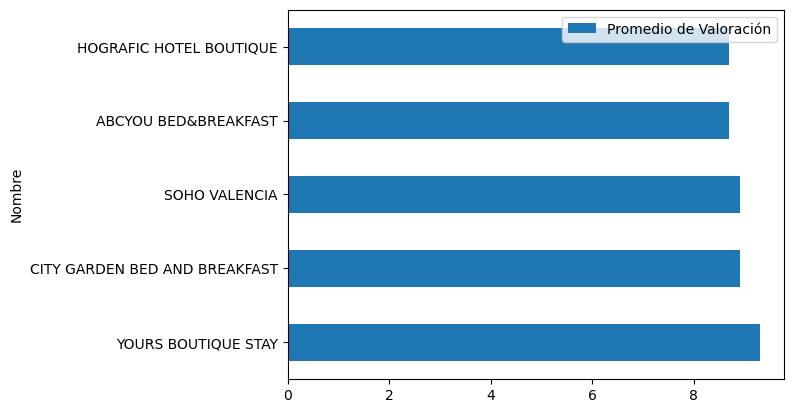

In [22]:

# Los hoteles con mejor promedio en el distrito con mejor promedio
prom_hotelesEix.plot.barh()
# Mostrar el gráfico
plt.show()

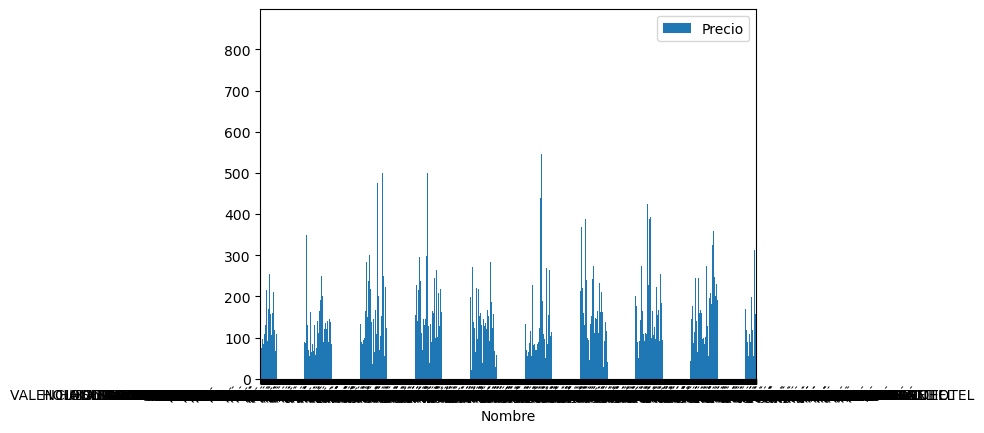

In [23]:
# Crear un gráfico de barras con los datos de la columna 'Precio' y 'Nombre'
precios_hoteles.plot.bar(x='Nombre', y='Precio', rot=0)
# Mostrar el gráfico
plt.show()

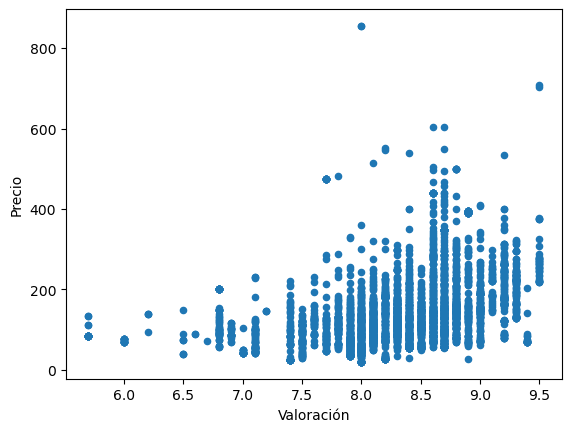

In [24]:
# Crear un gráfico de dispersión con los datos de la columna 'Precio' y 'Valoración'
precios_hoteles.plot.scatter(x='Valoración', y='Precio')

# Mostrar el gráfico
plt.show()

In [25]:
# Filtrar los hoteles cuyo precio es mayor a 80
precios_hoteles[precios_hoteles['Precio'] > 80]


,Nombre,Distrito,Valoración,Número de comentarios,Precio,Fecha,Dirección,CP,lat,long
4,SWEET HOTEL RENASA,"El Pla del Real, Valencia",8.1,3441,84.0,2022-07-31,"AVENIDA DE CATALUÑA, 5, Valencia",46010,39.480567,-0.35296
6,HOTEL TURIA,"Campanar, Valencia",7.5,3045,97.0,2022-07-31,"CARRER DEL PROFESOR BELTRÁN BÁGUENA, 2, Valencia",46009,39.480357,-0.389011
9,SWEET HOTEL CONTINENTAL,"Ciutat Vella, Valencia",8.1,3174,86.5,2022-07-31,"CALLE DE CORREOS, 8, Valencia",46002,39.469706,-0.374548
10,EUROSTARS REY DON JAIME,"Camins al Grau, Valencia",7.9,11638,127.0,2022-07-31,"AVENIDA BALEARES, 2, Valencia",46023,39.463394,-0.356647
12,ZENIT VALENCIA,"Extramurs, Valencia",8.6,1863,110.0,2022-07-31,"CALLE DE BAILÉN, 8, LA ROQUETA, Valencia",46007,39.466768,-0.37808
...,...,...,...,...,...,...,...,...,...,...
3954,SH SUITE PALACE,"Ciutat Vella, Valencia",8.5,261,105.5,2022-11-13,"PLAÇA DE MARGARITA VALLDAURA, 2, Valencia",46002,39.473334,-0.374854
3955,LOTELITO,"Ciutat Vella, Valencia",8.8,1299,228.0,2022-11-13,"CALLE DE VIRUÉS, 6, Valencia",46002,39.470981,-0.374681
3956,ORIGINAL DOMINO HOUSE,"Camins al Grau, Valencia",8.7,725,102.0,2022-11-13,"CALLE DE LAS ISLAS CANARIAS, 51, GRAO, Valencia",46023,39.461333,-0.338056
3957,REINA 107 BEACH BOUTIQUE,"Poblados marítimos, Valencia",8.7,393,349.0,2022-11-13,"CARRER DE LA REINA, 107, Valencia",46011,39.468452,-0.328803


In [26]:
# Ordenar los hoteles por valoración en orden descendente y obtener los primeros 10 hoteles
precios_hoteles.sort_values(by='Valoración', ascending=False).head(10)

,Nombre,Distrito,Valoración,Número de comentarios,Precio,Fecha,Dirección,CP,lat,long
981,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,221.0,2023-02-12,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
3767,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,272.0,2022-10-30,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
1182,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,249.5,2022-11-27,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
3661,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,832,374.0,2022-06-26,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
337,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,221.0,2022-12-18,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
2049,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,832,252.5,2022-07-17,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
3607,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,374.0,2022-12-04,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
150,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,796,707.5,2022-06-19,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
2430,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,266.5,2022-09-18,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
3041,PALACIO VALLIER 5*,"Ciutat Vella, Valencia",9.5,836,275.0,2022-09-11,"PLAZA DE MANISES, 7, Valencia",46003,39.476753,-0.376252
